# Import

In [1]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from file_py.utils import MarkdownHelper

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from file_py.run_log_parser import RunLogParser
from file_py.csv_preprocessing_scaler import CsvPreprocessingScaler

# Preprocessing

In [3]:
df = CsvPreprocessingScaler.read_csv_file("file_csv/LogSplunkWF_24_06.csv")

In [4]:
df_raw = CsvPreprocessingScaler.RawPreprocessing(df)

df_Le = CsvPreprocessingScaler.LEPreprocessing(df)
df_OH = CsvPreprocessingScaler.OhePreprocessing(df)

In [5]:
df_std_LE = CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.LEPreprocessing(df))
df_std_OH = CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.OhePreprocessing(df))

# Test

In [6]:
file_path = 'file_csv/attackLog_24_06.csv'
result_df_Le = RunLogParser.process_attacks(file_path, CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.LEPreprocessing(df)))
result_df_OH = RunLogParser.process_attacks(file_path, CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.OhePreprocessing(df)))

result_df_Raw = RunLogParser.process_attacks(file_path, CsvPreprocessingScaler.RawPreprocessing(df))

# Graphic Analysis of Attacks

In [7]:
from file_py.plots import Plots

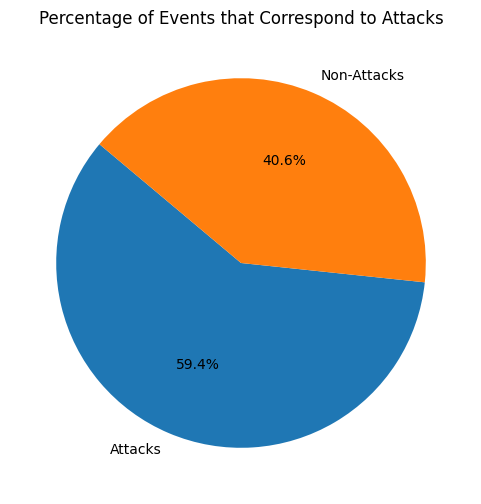

In [8]:
Plots.plot_cake_attack(result_df_Raw)

In [9]:
Plots.plot_top_10_signatures(result_df_Raw)

alt.VConcatChart(...)

Qui si può notare come generalmente le __regole scattate più volte__ sono anche quelle che hanno effettivamente __risposto a più attachi__ e che sono **scattate a vuoto più volte**.  

In [10]:
Plots.plot_precision_recall(result_df_Raw)

alt.VConcatChart(...)

Il *primo grafico* mostra la **precisione** di ciascuna regola, cioè la proporzione di **attivazioni corrette** rispetto al **totale delle sue attivazioni**.  
Una precisione più *alta* indica che la regola è *più accurata* nel rilevare veri attacchi.

Il *secondo grafico* mostra il **recall**, cioè la proporzione di **attacchi reali rilevati dalla regola** rispetto al **totale degli attacchi reali**.  
Un recall più *alto* indica che la regola è *più efficace* nel rilevare tutti gli attacchi possibili.

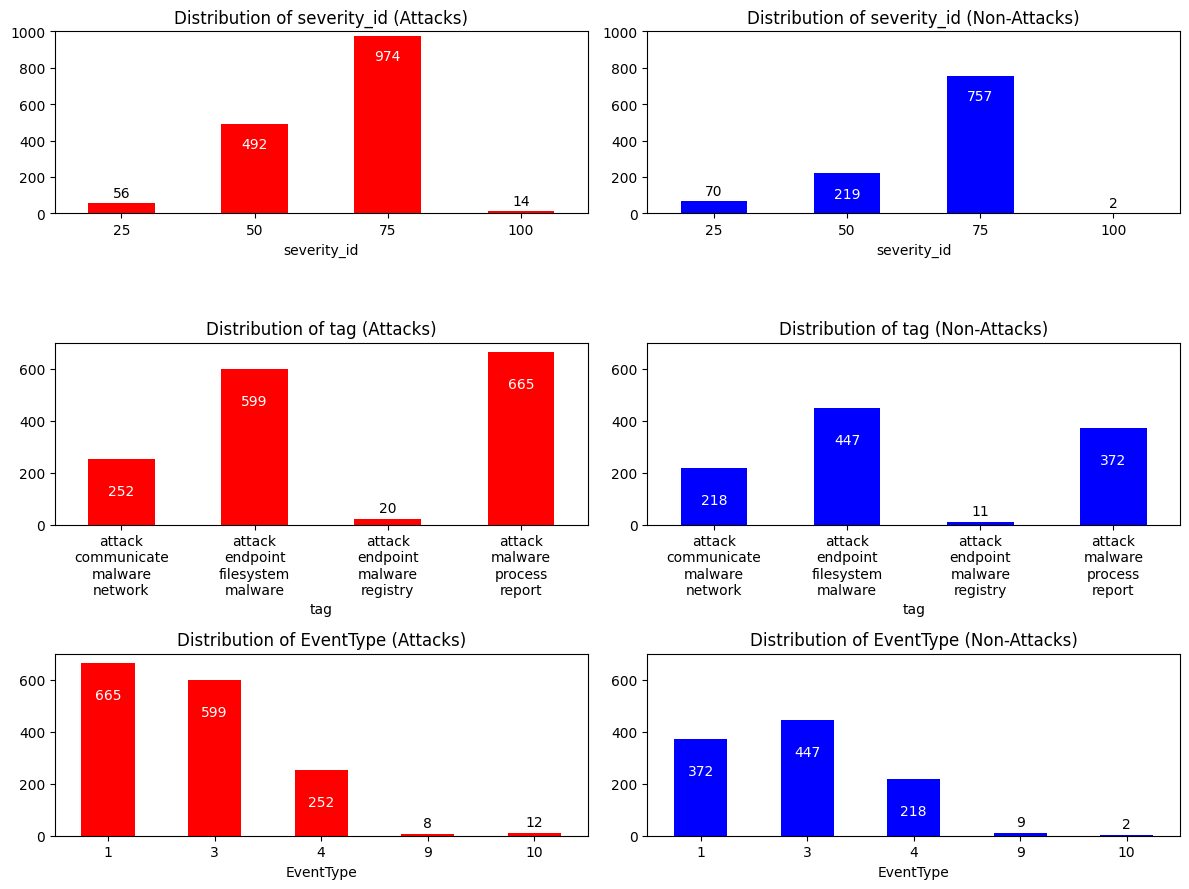

In [11]:
Plots.plot_distributions(result_df_Raw)

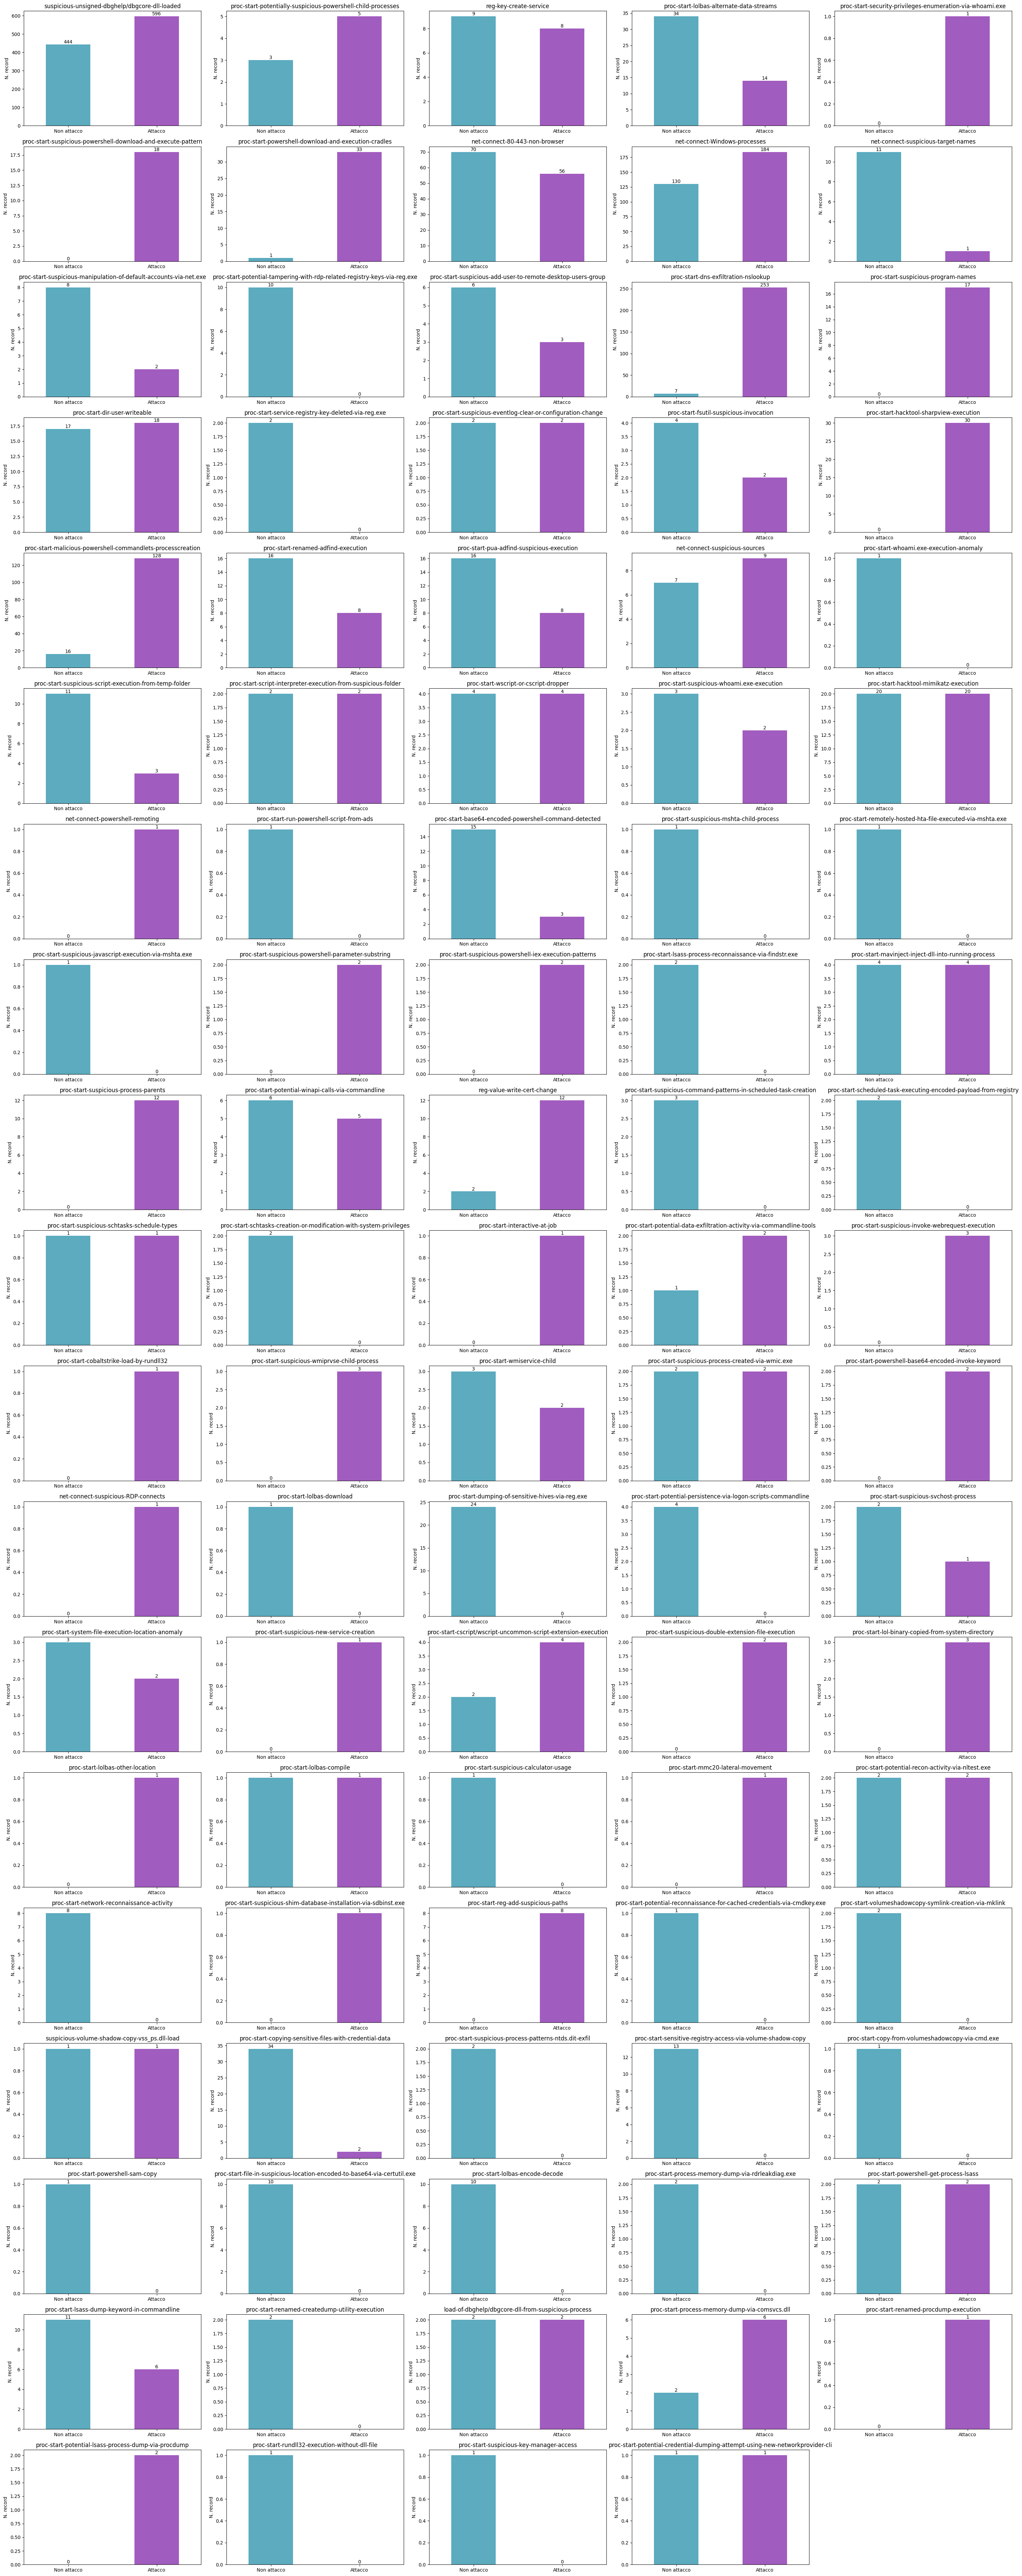

In [12]:
Plots.plot_value_counts_per_unique(result_df_Raw)

In [13]:
variables = MarkdownHelper.create_value_counts_variables(result_df_Raw)
MarkdownHelper.display_value_counts_text(variables)

<h5>Grazie a questo grafico invece possiamo giungere ad una serie di conclusioni.

Su **94** regole diverse:

- quelle scattate in risposta ad ALMENO un **attacco reale** sono **66**.
  Di queste:
  - **18** si sono attivate più volte per **non-attacchi** rispetto che per gli attacchi. (*regole generiche*)
  - **13** si sono attivate lo **stesso numero** di volte per attacchi e non-attacchi.
  - **35** si sono attivate più volte in risposta ad **attacchi** rispetto che a non-attacchi (*regole specifiche*).

- quelle scattate **senza rispondere mai ad attacchi** sono **28**.

  **Si tratta di**: ['proc-start-file-in-suspicious-location-encoded-to-base64-via-certutil.exe', 'proc-start-run-powershell-script-from-ads', 'proc-start-process-memory-dump-via-rdrleakdiag.exe', 'proc-start-copy-from-volumeshadowcopy-via-cmd.exe', 'proc-start-lsass-process-reconnaissance-via-findstr.exe', 'proc-start-suspicious-process-patterns-ntds.dit-exfil', 'proc-start-whoami.exe-execution-anomaly', 'proc-start-lolbas-download', 'proc-start-suspicious-calculator-usage', 'proc-start-service-registry-key-deleted-via-reg.exe', 'proc-start-dumping-of-sensitive-hives-via-reg.exe', 'proc-start-scheduled-task-executing-encoded-payload-from-registry', 'proc-start-potential-tampering-with-rdp-related-registry-keys-via-reg.exe', 'proc-start-remotely-hosted-hta-file-executed-via-mshta.exe', 'proc-start-sensitive-registry-access-via-volume-shadow-copy', 'proc-start-lolbas-encode-decode', 'proc-start-rundll32-execution-without-dll-file', 'proc-start-suspicious-key-manager-access', 'proc-start-schtasks-creation-or-modification-with-system-privileges', 'proc-start-volumeshadowcopy-symlink-creation-via-mklink', 'proc-start-network-reconnaissance-activity', 'proc-start-potential-persistence-via-logon-scripts-commandline', 'proc-start-powershell-sam-copy', 'proc-start-suspicious-mshta-child-process', 'proc-start-renamed-createdump-utility-execution', 'proc-start-suspicious-javascript-execution-via-mshta.exe', 'proc-start-potential-reconnaissance-for-cached-credentials-via-cmdkey.exe', 'proc-start-suspicious-command-patterns-in-scheduled-task-creation']</h5>

# Graphic Analysis of Attacks for Chosen Rule

In [14]:
from file_py.plots_single_attack import PlotsSingleAttack

In [15]:
regola_scelta = 'suspicious-unsigned-dbghelp/dbgcore-dll-loaded'

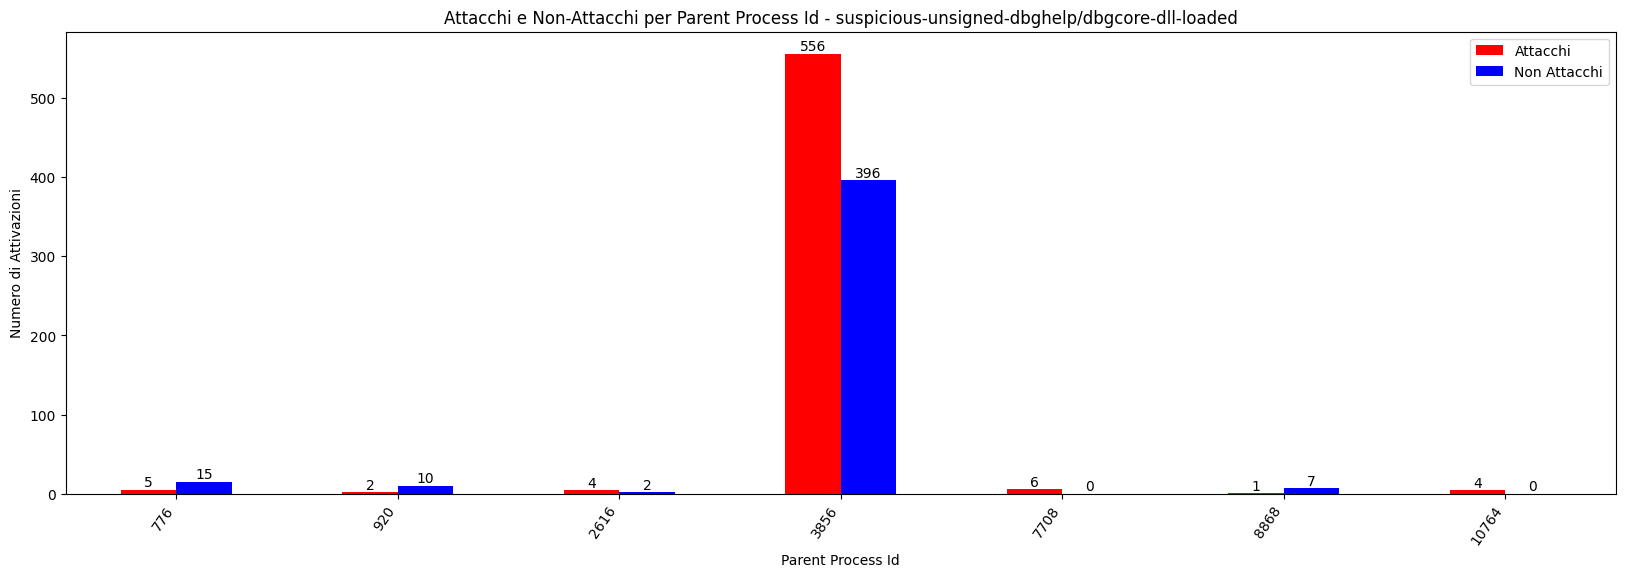

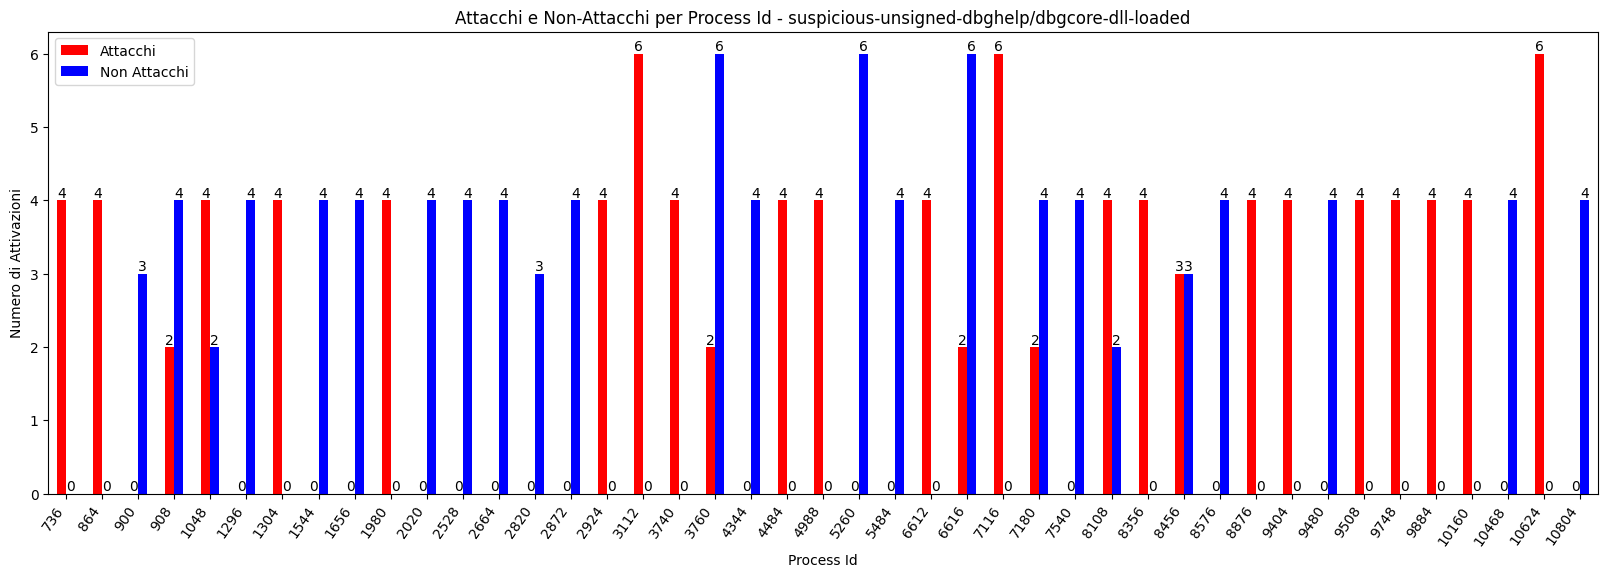

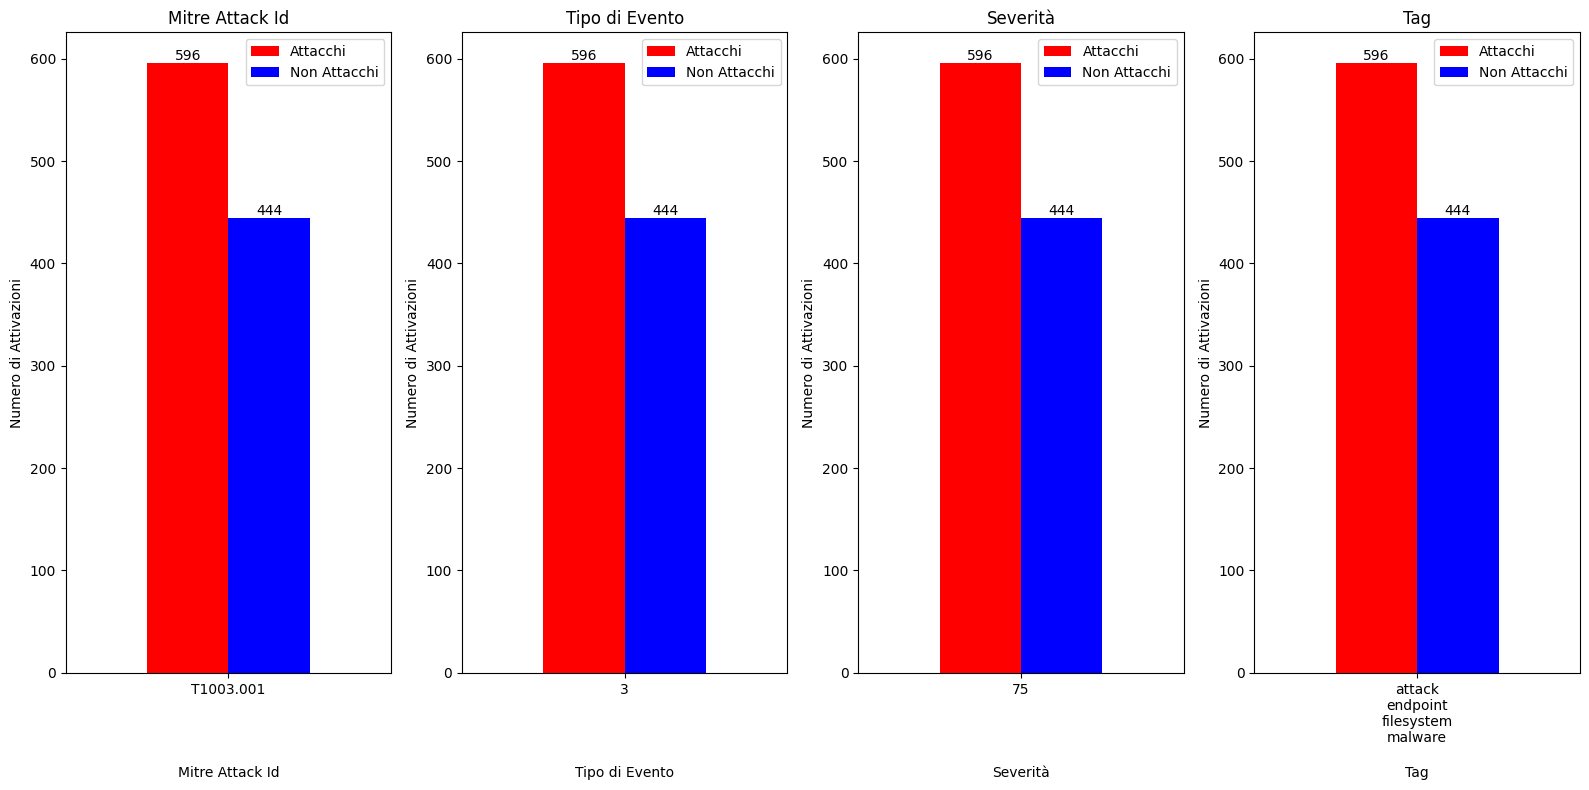

In [16]:
PlotsSingleAttack.analyze_rule_activations(result_df_Raw, regola_scelta)

In questi grafici in base alla **regola che si vuole analizzare** possiamo visualizzare:
- la **frequenza delle attivazioni** delle regole (attacchi e non attacchi) suddivise in intervalli di *5 minuti*;
- gli **attacchi e i non-attacchi** in base a:
    - *RuleAnnotation.mitre_attack.id*
    - *EventType*,
    - *severity*,
    - *tag*
    - *parent_process_id*,
    - *process_id*

alt.Chart(...)

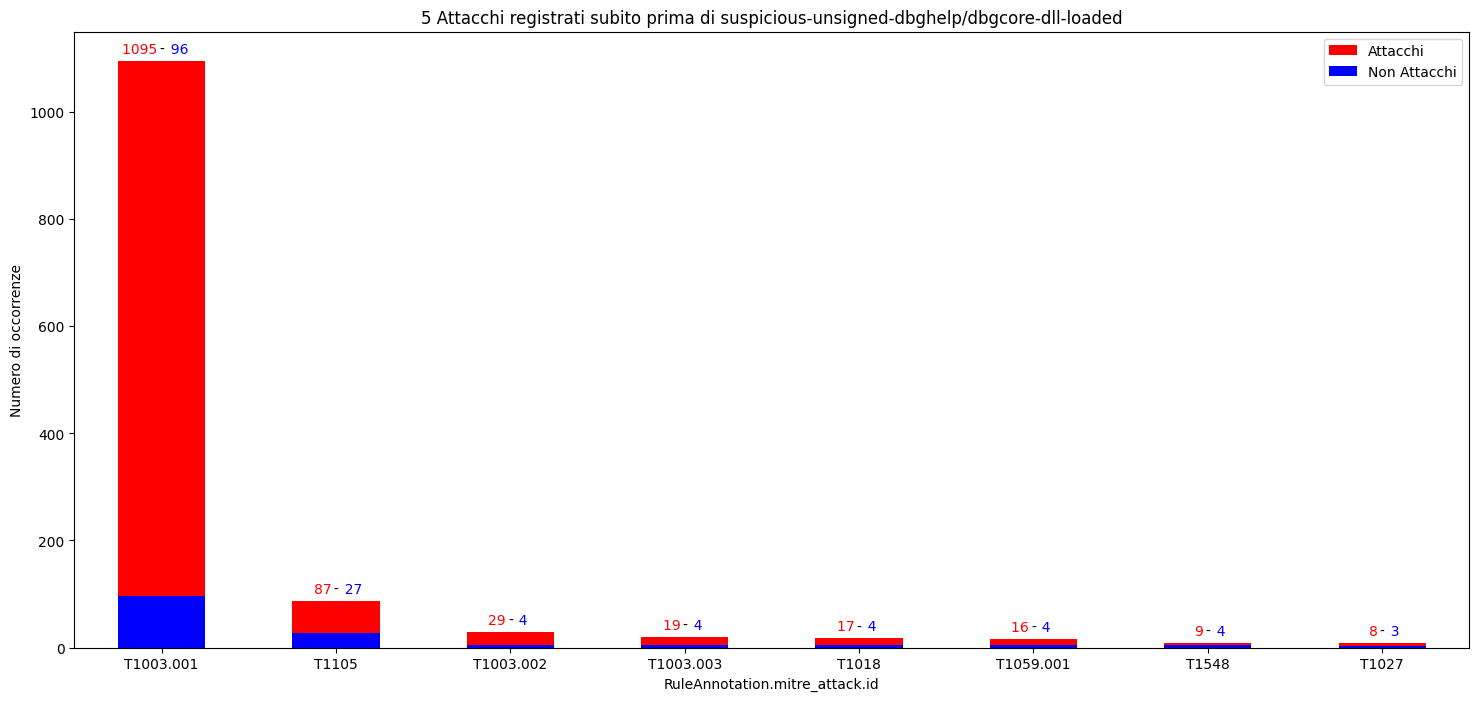

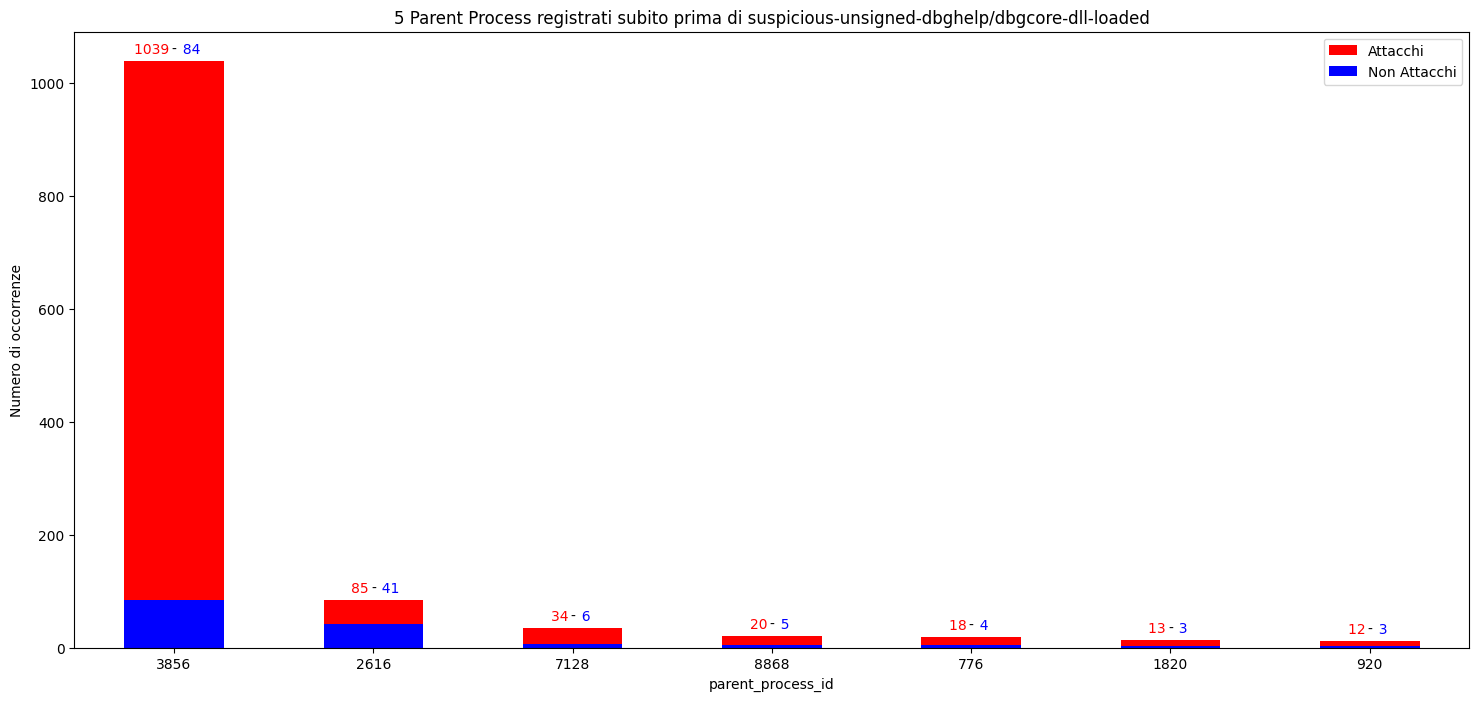

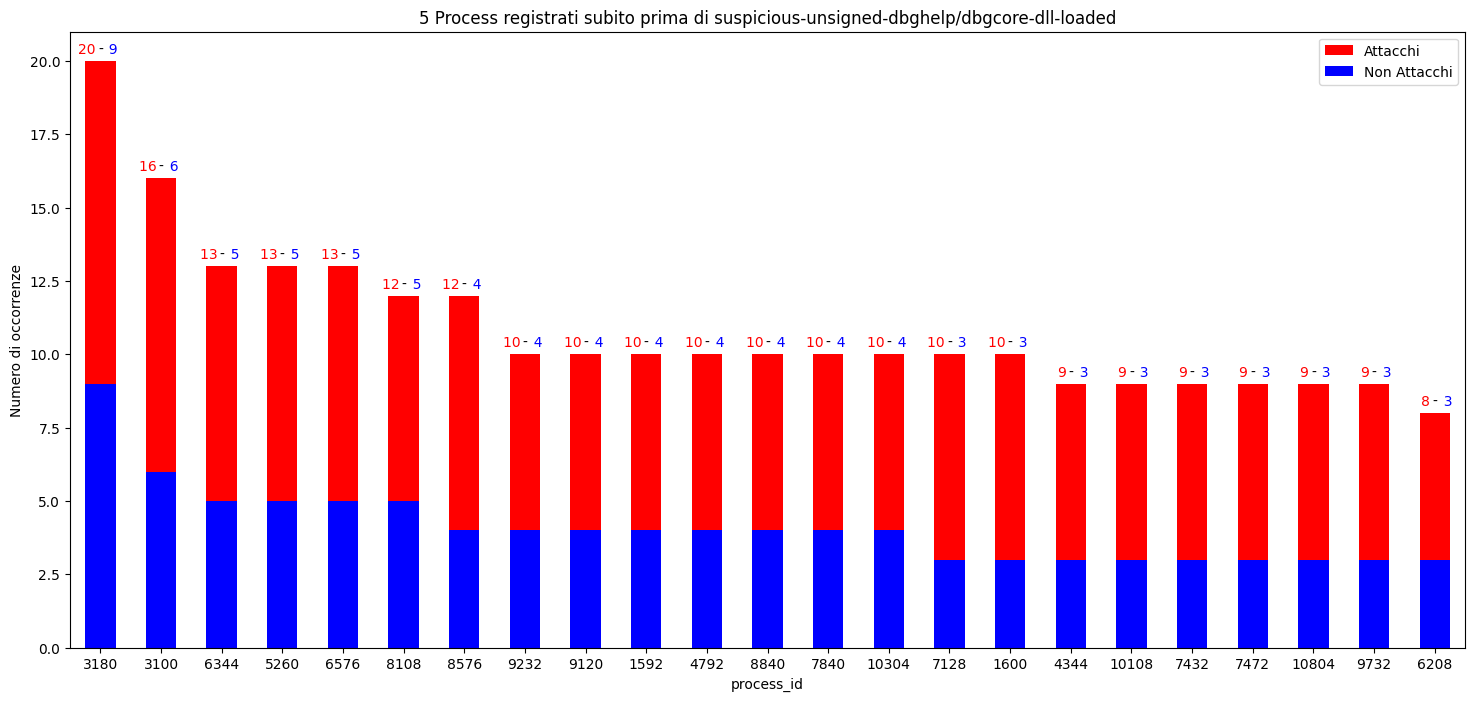

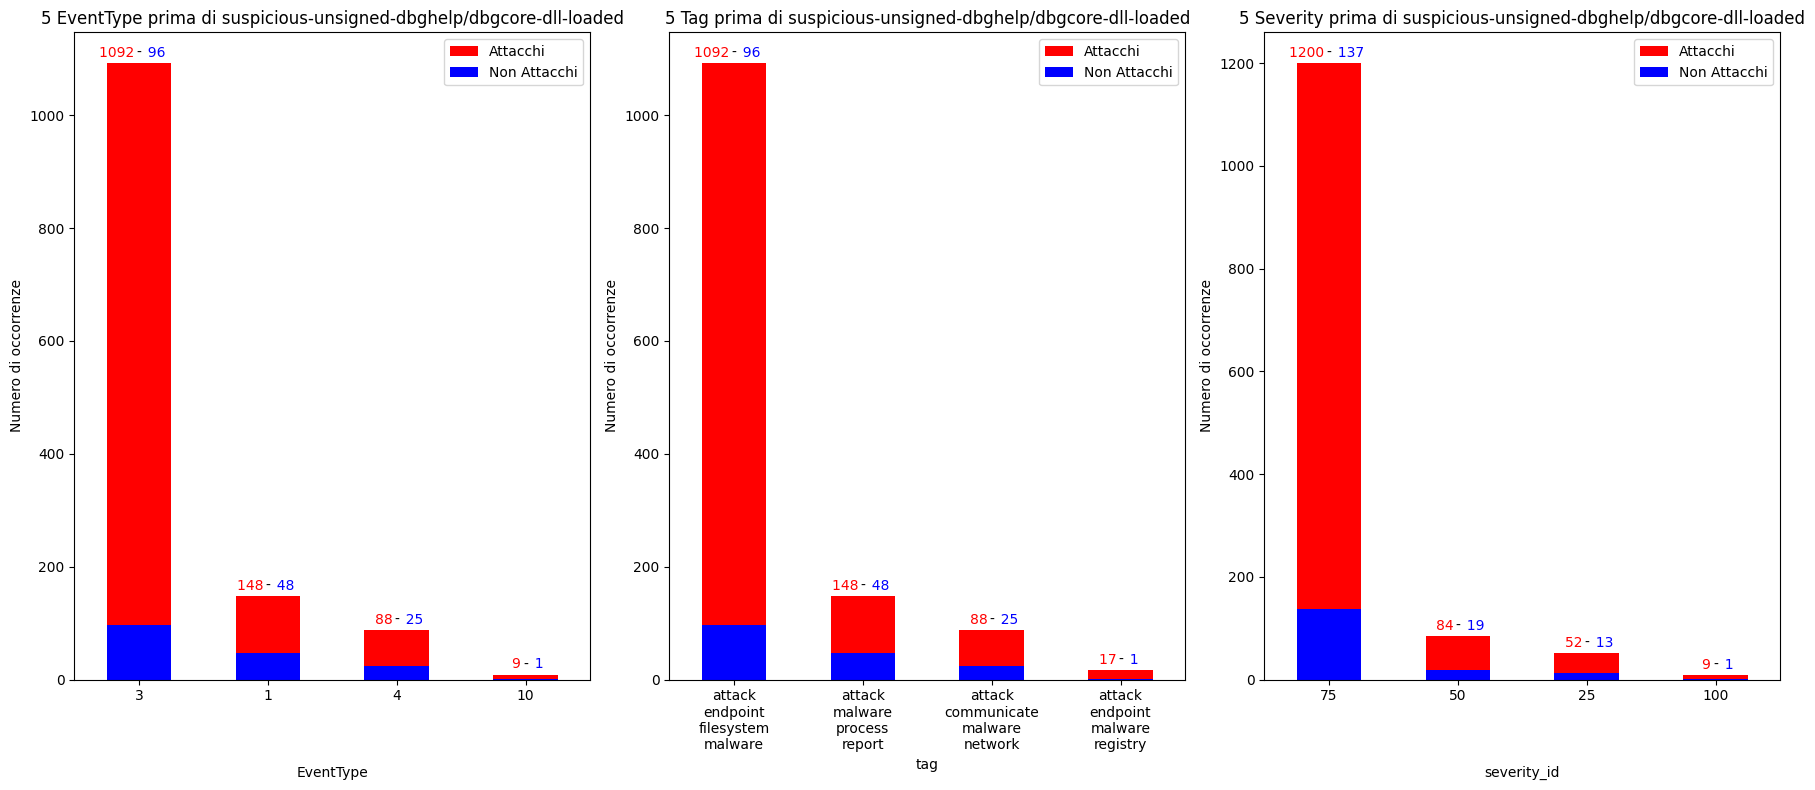

In [17]:
eventi_da_considerare = 5

PlotsSingleAttack.patterns_before_activation(result_df_Raw, regola_scelta, eventi_da_considerare)

In questi grafici vediamo quali sono rispettivamente le *regole*, gli *attacchi*, gli *EventType*, i *tag*, i *parent_process*, i *process* e le *severity* degli eventi **subito prima** delle **prime attivazioni** della *regola scelta*.  
Il **numero di eventi da considerare** lo scegliamo affidando alla variabile *elementi_da_considerare* il numero che vogliamo.

Con "**prima attivazione di una regola**" si intende quando **almeno un elemento** delle colonne *signature, RuleAnnotation.mitre_attack.id, EventType, tag, severity_id, parent_process_id o process_id* (non sono considerate solo le colonne _time e corrisponde_ad_attacco) *di un evento* **differisce** da quello *precedente*.

# Correlation Matrix

In [18]:
from file_py.correlation_matrix_plots import CorrelationMatrixPlots

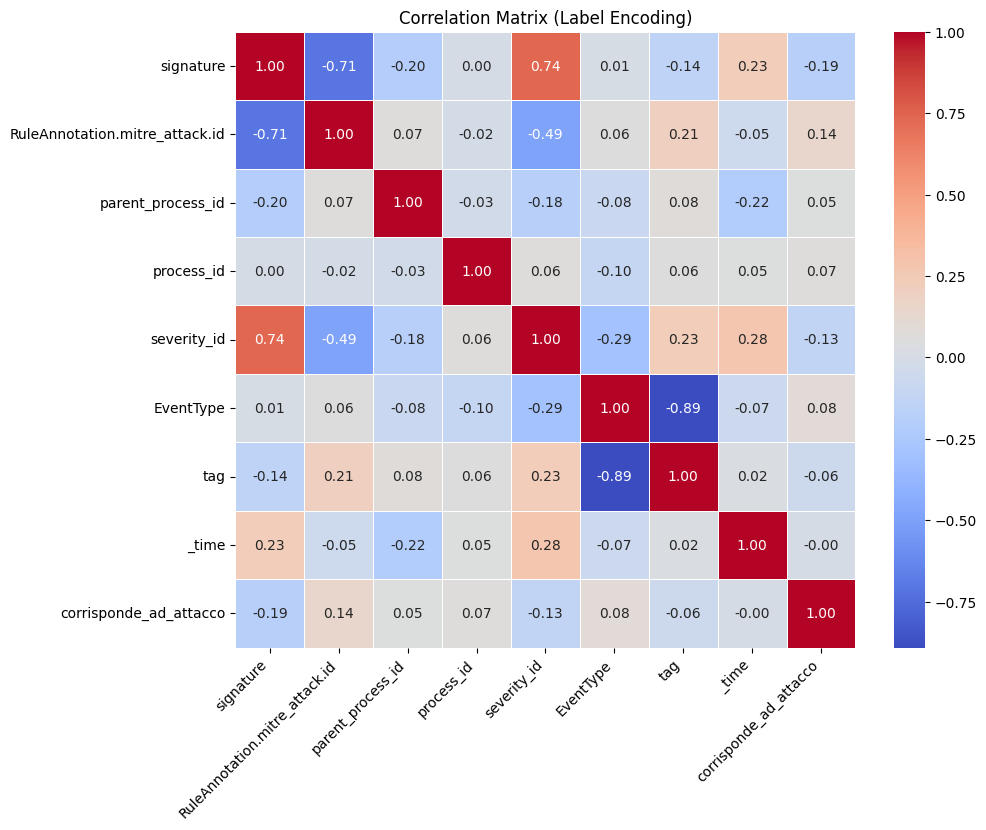

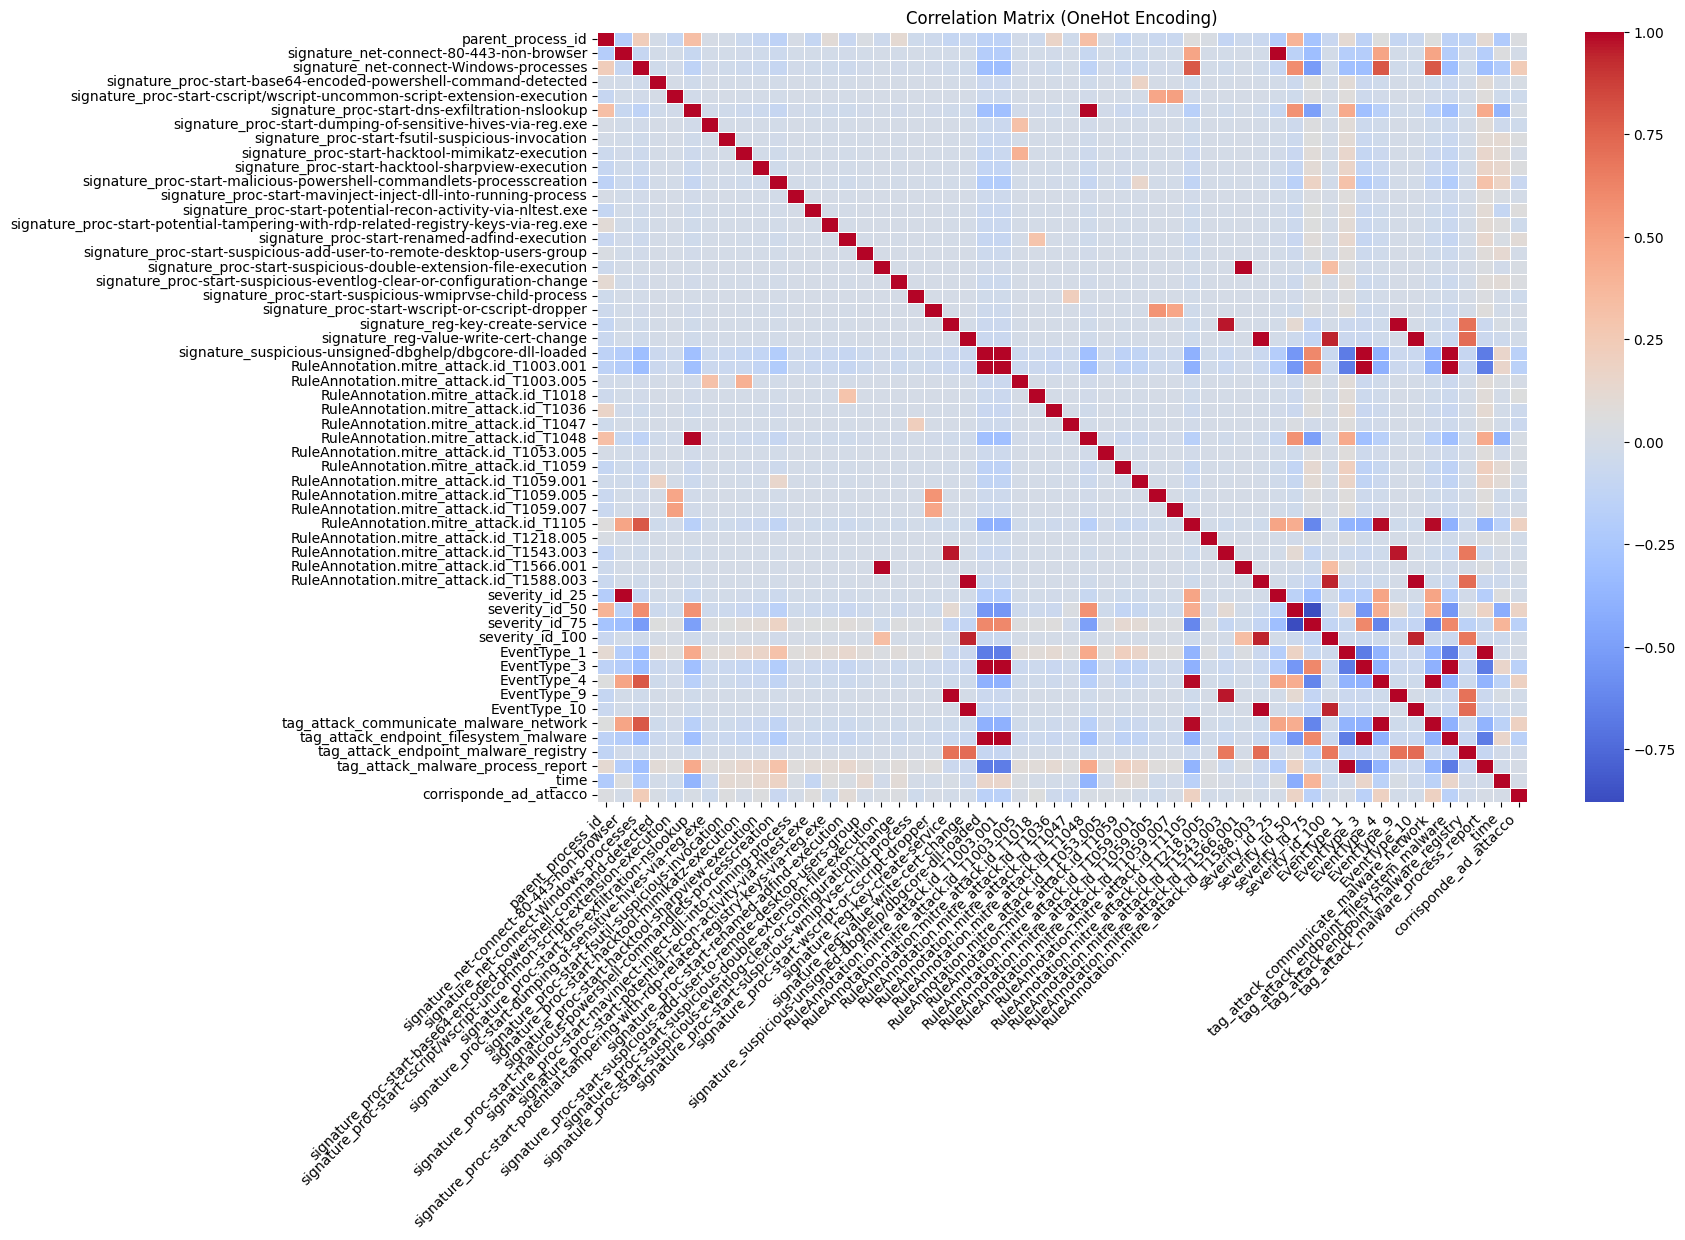

In [19]:
CorrelationMatrixPlots.plot_correlation_matrix(result_df_Le, 'Correlation Matrix (Label Encoding)')
CorrelationMatrixPlots.plot_correlation_matrix_big(result_df_OH, 'Correlation Matrix (OneHot Encoding)')

# ML

In [20]:
from file_py.preprocessing_train_test_split import PreprocessingTrainTestSplit
from file_py.initial_training import InitialTraining
from file_py.hyperparameter_tuning import HyperparameterTuning
from file_py.advanced_models import AdvancedModels
from file_py.deep_learning_model import DeepLearningModel
from file_py.model_evaluator import ModelEvaluator

### OneHot

In [21]:
# Split data
X_train_OH, X_test_OH, y_train_OH, y_test_OH = PreprocessingTrainTestSplit.split_data(result_df_OH, "corrisponde_ad_attacco")

# Initial model training and evaluation
InitialTraining.train_and_evaluate_initial_models(X_train_OH, y_train_OH, X_test_OH, y_test_OH)

# Hyperparameter tuning
best_models_OH = HyperparameterTuning.tune_hyperparameters(X_train_OH, y_train_OH)

# Evaluate best models on test set
evaluator_OH = ModelEvaluator(best_models_OH)
evaluation_results_OH = evaluator_OH.evaluate_models(X_test_OH, y_test_OH)

# Train XGBoost model
AdvancedModels.train_xgboost(X_train_OH, y_train_OH, X_test_OH, y_test_OH)

# Train deep learning model
DeepLearningModel.train_deep_learning_model(X_train_OH, y_train_OH, X_test_OH, y_test_OH)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       266
           1       0.88      0.83      0.86       380

    accuracy                           0.83       646
   macro avg       0.83      0.83      0.83       646
weighted avg       0.84      0.83      0.84       646


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.55      0.63       266
           1       0.73      0.87      0.80       380

    accuracy                           0.74       646
   macro avg       0.74      0.71      0.72       646
weighted avg       0.74      0.74      0.73       646


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       266
           1       0.87      0.85      0.86       380

    accuracy                           0.83       646
   macro avg       0.83  

<Sequential name=sequential, built=True>

### Label

In [22]:
# Split data
X_train_Le, X_test_Le, y_train_Le, y_test_Le = PreprocessingTrainTestSplit.split_data(result_df_Le, "corrisponde_ad_attacco")

# Initial model training and evaluation
InitialTraining.train_and_evaluate_initial_models(X_train_Le, y_train_Le, X_test_Le, y_test_Le)

# Hyperparameter tuning
best_models_Le = HyperparameterTuning.tune_hyperparameters(X_train_Le, y_train_Le)

# Evaluate best models on test set
evaluator_Le = ModelEvaluator(best_models_Le)
evaluation_results_Le = evaluator_Le.evaluate_models(X_test_Le, y_test_Le)

# Train XGBoost model
AdvancedModels.train_xgboost(X_train_Le, y_train_Le, X_test_Le, y_test_Le)

# Train deep learning model
DeepLearningModel.train_deep_learning_model(X_train_Le, y_train_Le, X_test_Le, y_test_Le)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       266
           1       0.88      0.84      0.86       380

    accuracy                           0.84       646
   macro avg       0.83      0.84      0.84       646
weighted avg       0.84      0.84      0.84       646


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.53      0.61       266
           1       0.72      0.84      0.78       380

    accuracy                           0.72       646
   macro avg       0.71      0.69      0.69       646
weighted avg       0.71      0.72      0.71       646


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       266
           1       0.86      0.84      0.85       380

    accuracy                           0.83       646
   macro avg       0.82  

<Sequential name=sequential_1, built=True>

In [23]:
evaluator_OH.print_best_model('OneHot Encoder')
evaluator_Le.print_best_model('Label Encoder')


Dopo la codifica con OneHot Encoder il modello migliore è stato KNN con lo score di 0.9234

Dopo la codifica con Label Encoder il modello migliore è stato KNN con lo score di 0.9507
